Import Libraries


In [4]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report




Load the Dataset

In [5]:
df = pd.read_csv("C:\Capstone_project_(8th sem)\MindSight\Dataset\DASS.csv")


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\1716385433.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("C:\Capstone_project_(8th sem)\MindSight\Dataset\DASS.csv")


 Drop Unwanted Columns

In [6]:

# Dropping Marital Status (Q1_3) and Occupational Status (Q1_5)
df.drop(['Q1_3', 'Q1_5'], axis=1, inplace=True)

# Check for null values
print(df.isnull().sum())


Q1_1                0
Q1_2                0
Q1_4                0
Q1_6                0
Q3_1_S1             0
Q3_2_S2             0
Q3_3_S3             0
Q3_4_S4             0
Q3_5_S5             0
Q3_6_S6             0
Q3_7_S7             0
Stress_Score        0
Stress_Level        0
Q3_8_A1             0
Q3_9_A2             0
Q3_10_A3            0
Q3_11_A4            0
Q3_12_A5            0
Q3_13_A6            0
Q3_14_A7            0
Anxiety_Score       0
Anxiety_Level       0
Q3_15_D1            0
Q3_16_D2            0
Q3_17_D3            0
Q3_18_D4            0
Q3_19_D5            0
Q3_20_D6            0
Q3_21_D7            0
Depression_Score    0
Depression_Level    0
dtype: int64


Check Dataset Shape and Head

In [7]:
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1812, 31)


,Q1_1,Q1_2,Q1_4,Q1_6,Q3_1_S1,Q3_2_S2,Q3_3_S3,Q3_4_S4,Q3_5_S5,Q3_6_S6,...,Anxiety_Level,Q3_15_D1,Q3_16_D2,Q3_17_D3,Q3_18_D4,Q3_19_D5,Q3_20_D6,Q3_21_D7,Depression_Score,Depression_Level
0,21,2,4,1,3,3,3,3,1,1,...,3,0,3,3,2,3,3,3,17,5
1,18,2,4,1,3,3,3,3,1,1,...,2,0,2,3,0,0,2,0,7,3
2,40,2,2,1,3,3,1,2,2,2,...,5,2,1,1,2,2,1,2,11,4
3,24,1,4,0,3,3,1,2,2,2,...,5,2,1,1,2,2,1,2,11,4
4,50,1,2,0,3,3,3,2,1,2,...,2,1,0,0,1,2,0,0,4,1


Label Encoding (Optional for Gender or Categorical if needed)

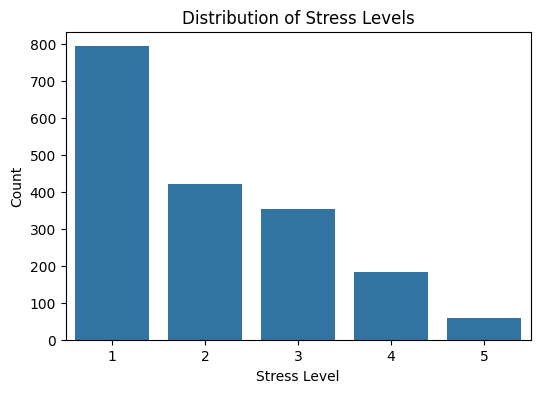

In [8]:

plt.figure(figsize=(6,4))
sns.countplot(x='Stress_Level', data=df)
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

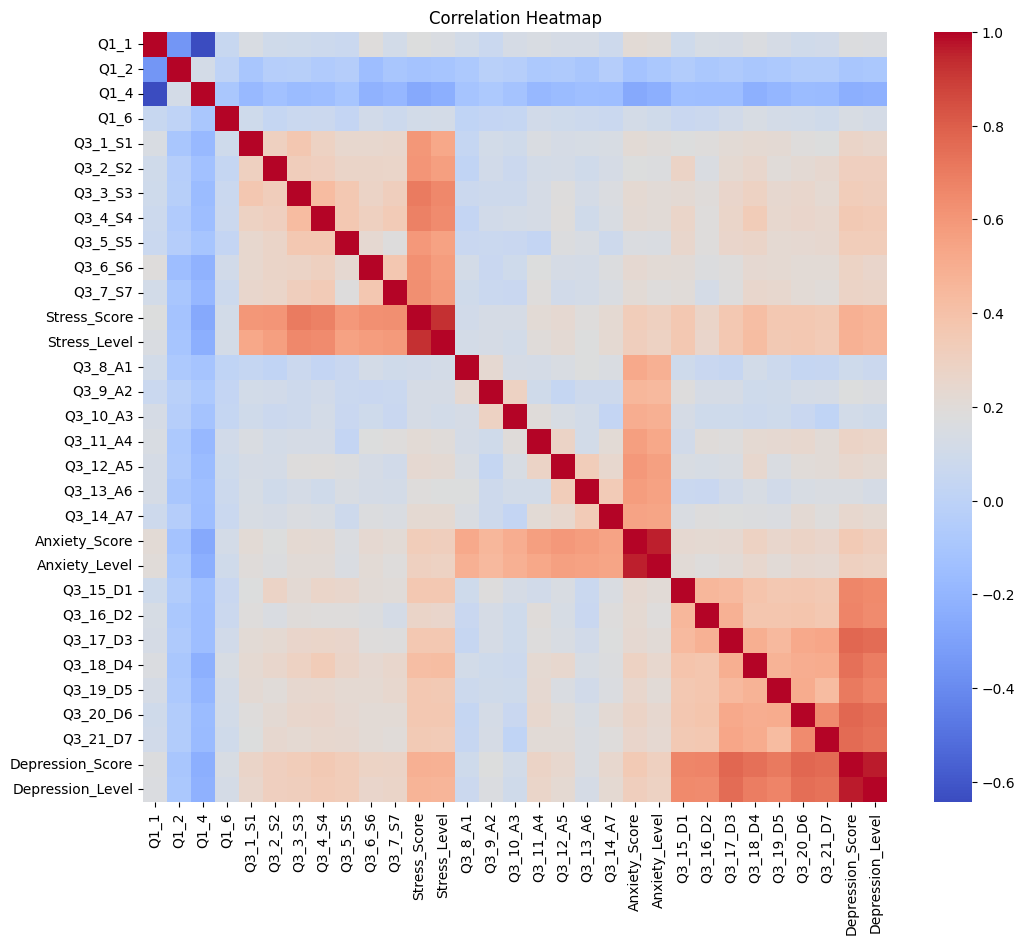

In [9]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

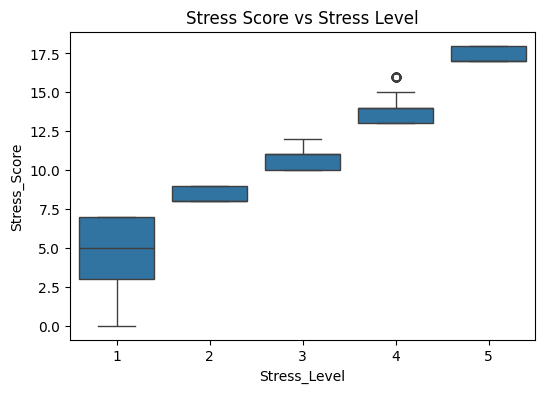

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Stress_Level', y='Stress_Score', data=df)
plt.title('Stress Score vs Stress Level')
plt.show()


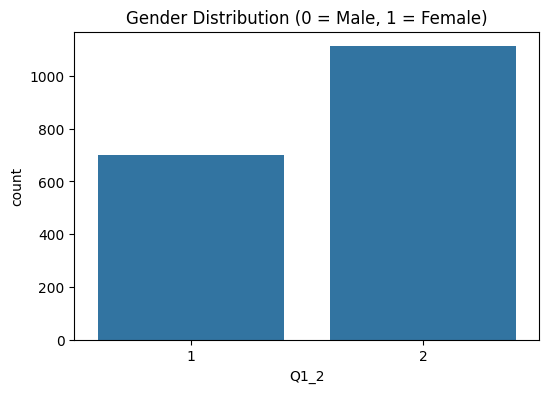

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Q1_2', data=df)
plt.title('Gender Distribution (0 = Male, 1 = Female)')
plt.show()


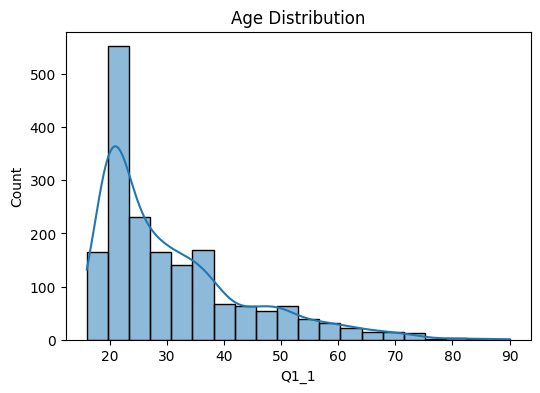

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['Q1_1'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


In [13]:
# Gender is 1=Male, 2=Female (optional: convert to 0 and 1)
df['Q1_2'] = df['Q1_2'].map({1: 0, 2: 1})  # 0: Male, 1: Female


In [14]:
X = df.drop(['Stress_Level', 'Stress_Score', 'Anxiety_Level', 'Anxiety_Score', 
             'Depression_Level', 'Depression_Score'], axis=1)
y = df['Stress_Level']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set:", X_train.shape)
print("Test Set:", X_test.shape)


Training Set: (1449, 25)
Test Set: (363, 25)


In [16]:
df['Calculated_Score'] = df[[col for col in df.columns if 'Q3_' in col and '_S' in col]].sum(axis=1)
print((df['Calculated_Score'] == df['Stress_Score']).value_counts())


True    1812
Name: count, dtype: int64


In [17]:
# Using only raw stress question responses as features
stress_features = [col for col in df.columns if 'Q3_' in col and '_S' in col]
X = df[stress_features]
y = df['Stress_Level']


In [18]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
SEED = 42

# Models dictionary updated as requested
models = {
    "Logistic Regression": LogisticRegression(random_state=SEED, max_iter=1000, C=0.1,class_weight='balanced'),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(random_state=SEED),
    "Decision Tree": DecisionTreeClassifier(random_state=SEED),
    "Random Forest": RandomForestClassifier(random_state=SEED),
    "Gradient Boosting": GradientBoostingClassifier(random_state=SEED),
    "AdaBoost": AdaBoostClassifier(random_state=SEED),
    "SVM": SVC(random_state=SEED),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=SEED, eval_metric='mlogloss')
}

In [21]:
results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    if model_name == 'XGBoost':
        # Handle XGBoost class indexing if needed
        model.fit(X_train_scaled, y_train - 1)  # Shifting classes to 0-based
        y_pred = model.predict(X_test_scaled)
        y_pred = y_pred + 1  # Shift back to original classes
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

Training Logistic Regression...
Training Stochastic Gradient Descent (SGD)...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training AdaBoost...
Training SVM...
Training K-Nearest Neighbors (KNN)...
Training Naive Bayes...
Training XGBoost...


In [22]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_df)


                               Model  Accuracy  Precision    Recall  F1 Score
0                                SVM  0.980716   0.981420  0.980716  0.980674
1                Logistic Regression  0.964187   0.968433  0.964187  0.964951
2                  Gradient Boosting  0.950413   0.951913  0.950413  0.949997
3                            XGBoost  0.947658   0.948309  0.947658  0.947847
4                      Decision Tree  0.933884   0.935799  0.933884  0.934230
5                      Random Forest  0.931129   0.932445  0.931129  0.931307
6          K-Nearest Neighbors (KNN)  0.865014   0.869215  0.865014  0.862733
7                        Naive Bayes  0.845730   0.858954  0.845730  0.848625
8  Stochastic Gradient Descent (SGD)  0.694215   0.570248  0.694215  0.608392
9                           AdaBoost  0.391185   0.236682  0.391185  0.281728


C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\3215010083.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\3215010083.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\3215010083.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\3215010083.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

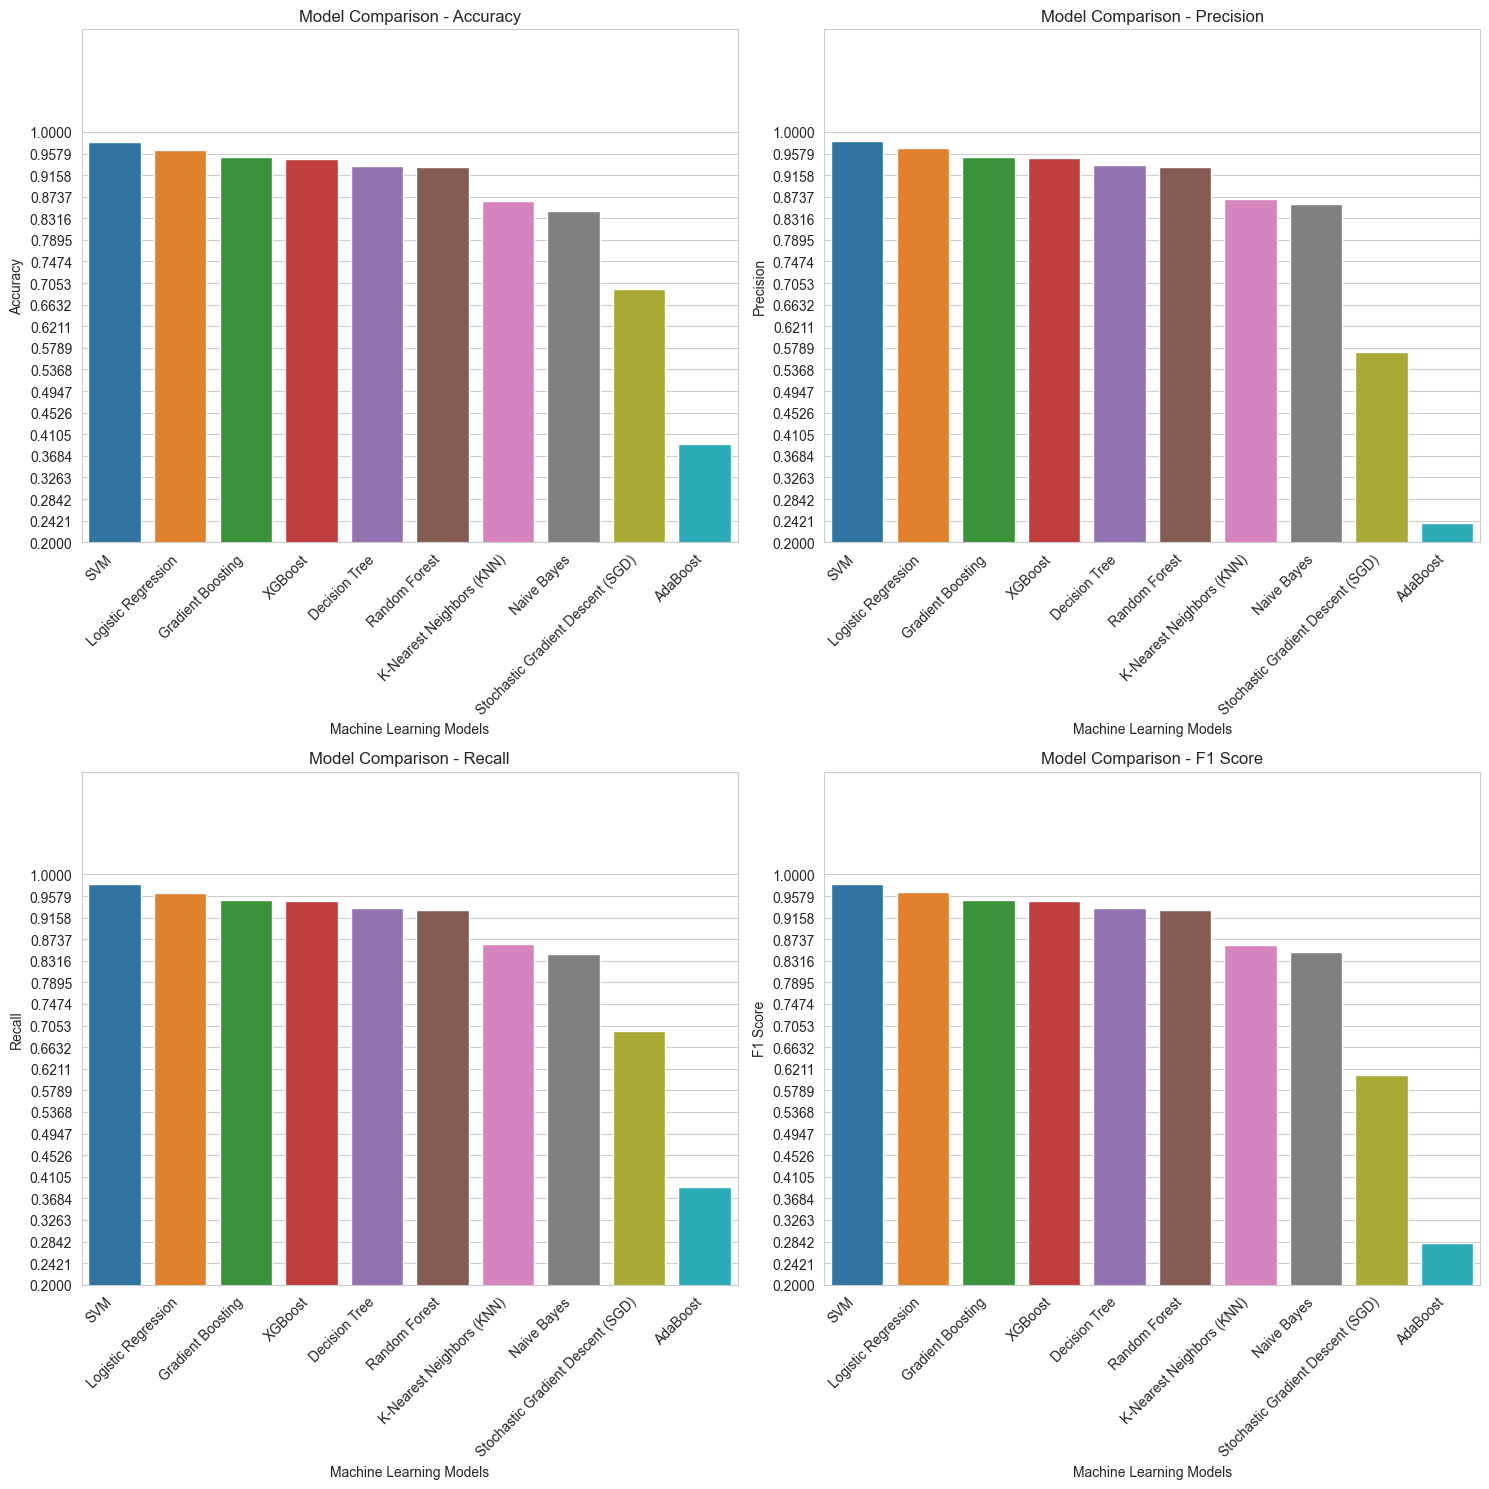

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'results_df' already contains Model, Accuracy, Precision, Recall, F1 Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(15, 15))
sns.set_style("whitegrid")

for idx, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, idx)
    colors = sns.color_palette("tab10", n_colors=len(results_df))
    sns.barplot(
        x='Model',
        y=metric,
        data=results_df,
        palette=colors
    )
    plt.ylim(0.20, 1.2)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(np.linspace(0.20, 1.0, 20))
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xlabel('Machine Learning Models')

plt.tight_layout()
plt.show()


anxiety

In [24]:
# Extract raw anxiety DASS questions (Q3_8_A1 to Q3_14_A7)
anxiety_features = [col for col in df.columns if 'Q3_' in col and '_A' in col]

X = df[anxiety_features]
y = df['Anxiety_Level']  # Target variable


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
models = {
    "Logistic Regression": LogisticRegression(random_state=SEED, max_iter=1000, C=0.1,class_weight='balanced'),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(random_state=SEED),
    "Decision Tree": DecisionTreeClassifier(random_state=SEED),
    "Random Forest": RandomForestClassifier(random_state=SEED),
    "Gradient Boosting": GradientBoostingClassifier(random_state=SEED),
    "AdaBoost": AdaBoostClassifier(random_state=SEED),
    "SVM": SVC(random_state=SEED),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=SEED, eval_metric='mlogloss')
}


In [28]:
results = []

for model_name, model in models.items():
    print(f"Training {model_name} for Anxiety Prediction...")
    
    if model_name == 'XGBoost':
        model.fit(X_train_scaled, y_train - 1)  # Shift classes to 0-based
        y_pred = model.predict(X_test_scaled) + 1  # Shift back predictions
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })


Training Logistic Regression for Anxiety Prediction...
Training Stochastic Gradient Descent (SGD) for Anxiety Prediction...
Training Decision Tree for Anxiety Prediction...
Training Random Forest for Anxiety Prediction...
Training Gradient Boosting for Anxiety Prediction...
Training AdaBoost for Anxiety Prediction...
Training SVM for Anxiety Prediction...
Training K-Nearest Neighbors (KNN) for Anxiety Prediction...
Training Naive Bayes for Anxiety Prediction...
Training XGBoost for Anxiety Prediction...


In [29]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_df)


                               Model  Accuracy  Precision    Recall  F1 Score
0                                SVM  0.986226   0.986971  0.986226  0.986269
1                Logistic Regression  0.983471   0.984816  0.983471  0.983564
2                            XGBoost  0.950413   0.950339  0.950413  0.950298
3                      Random Forest  0.947658   0.947599  0.947658  0.947552
4                      Decision Tree  0.944904   0.945109  0.944904  0.944767
5                  Gradient Boosting  0.909091   0.910055  0.909091  0.908124
6          K-Nearest Neighbors (KNN)  0.840220   0.840164  0.840220  0.836862
7  Stochastic Gradient Descent (SGD)  0.774105   0.719064  0.774105  0.716305
8                        Naive Bayes  0.746556   0.775461  0.746556  0.748332
9                           AdaBoost  0.363636   0.444981  0.363636  0.303441


C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\2573497882.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\2573497882.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\2573497882.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\2573497882.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

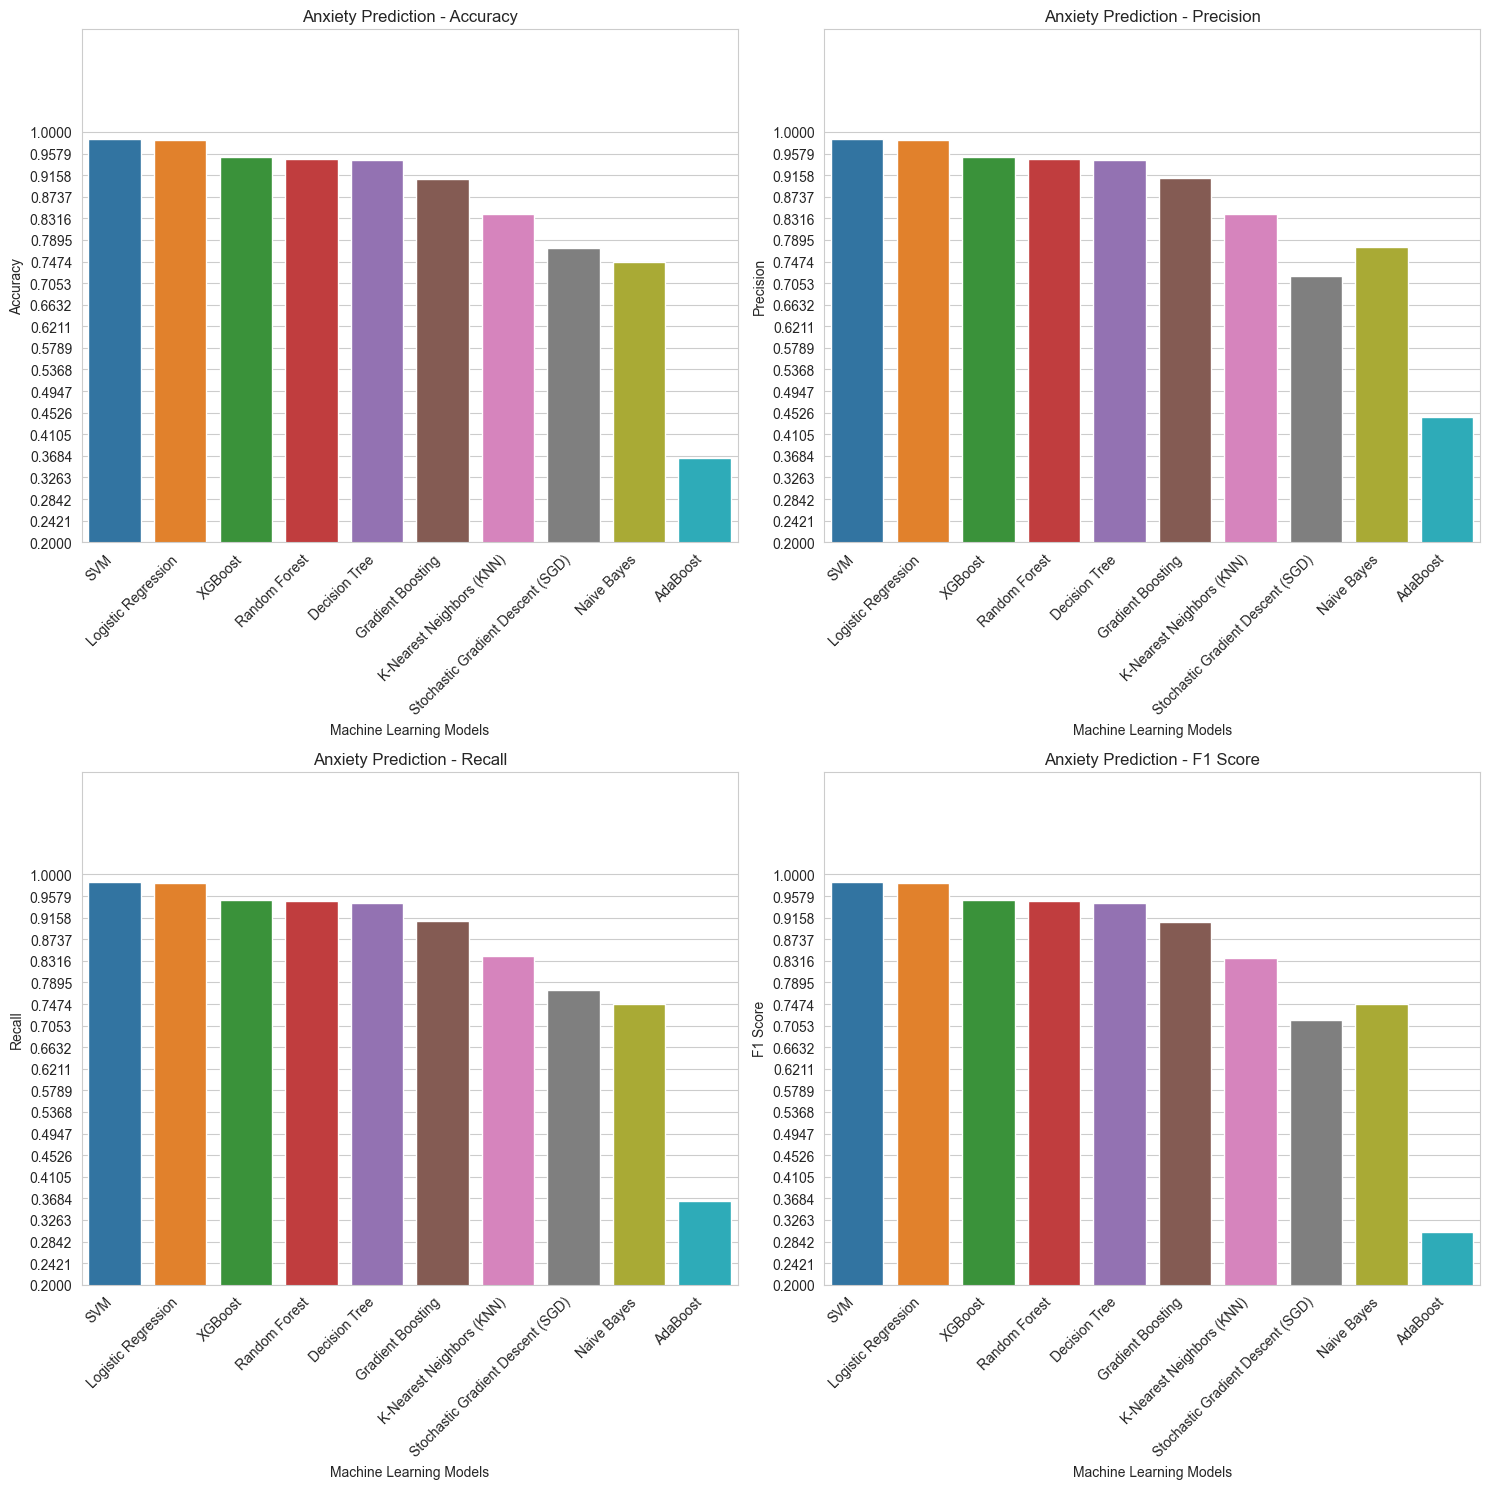

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming results_df already has 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(15, 15))
sns.set_style("whitegrid")

for idx, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, idx)
    colors = sns.color_palette("tab10", n_colors=len(results_df))
    sns.barplot(
        x='Model',
        y=metric,
        data=results_df,
        palette=colors
    )
    plt.ylim(0.20, 1.2)
    plt.yticks(np.linspace(0.20, 1.0, 20))
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Anxiety Prediction - {metric}')
    plt.ylabel(metric)
    plt.xlabel('Machine Learning Models')

plt.tight_layout()
plt.show()


Depression

In [31]:
depression_features = [col for col in df.columns if 'Q3_' in col and '_D' in col]
X = df[depression_features]
y = df['Depression_Level']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
models = {
    "Logistic Regression": LogisticRegression(
        random_state=SEED,max_iter=1000,C=0.1,class_weight='balanced'),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(random_state=SEED),
    "Decision Tree": DecisionTreeClassifier(random_state=SEED),
    "Random Forest": RandomForestClassifier(random_state=SEED),
    "Gradient Boosting": GradientBoostingClassifier(random_state=SEED),
    "AdaBoost": AdaBoostClassifier(random_state=SEED),
    "SVM": SVC(random_state=SEED),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=SEED, eval_metric='mlogloss')
}


In [35]:
results = []

for model_name, model in models.items():
    print(f"Training {model_name} for Depression Prediction...")
    
    if model_name == 'XGBoost':
        model.fit(X_train_scaled, y_train - 1)  # Shift classes for XGBoost
        y_pred = model.predict(X_test_scaled) + 1
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })


Training Logistic Regression for Depression Prediction...
Training Stochastic Gradient Descent (SGD) for Depression Prediction...
Training Decision Tree for Depression Prediction...
Training Random Forest for Depression Prediction...
Training Gradient Boosting for Depression Prediction...
Training AdaBoost for Depression Prediction...
Training SVM for Depression Prediction...
Training K-Nearest Neighbors (KNN) for Depression Prediction...
Training Naive Bayes for Depression Prediction...
Training XGBoost for Depression Prediction...


In [36]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_df)


                               Model  Accuracy  Precision    Recall  F1 Score
0                                SVM  0.972452   0.972813  0.972452  0.972424
1                Logistic Regression  0.969697   0.972549  0.969697  0.970215
2                            XGBoost  0.944904   0.944620  0.944904  0.944281
3                      Random Forest  0.944904   0.944604  0.944904  0.944118
4                      Decision Tree  0.917355   0.916185  0.917355  0.916053
5                  Gradient Boosting  0.914601   0.914364  0.914601  0.913957
6          K-Nearest Neighbors (KNN)  0.851240   0.851292  0.851240  0.850241
7                        Naive Bayes  0.837466   0.852756  0.837466  0.839784
8  Stochastic Gradient Descent (SGD)  0.771350   0.774732  0.771350  0.771278
9                           AdaBoost  0.388430   0.217147  0.388430  0.270663


C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\3545634488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\3545634488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\3545634488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Susheeth G\AppData\Local\Temp\ipykernel_26204\3545634488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

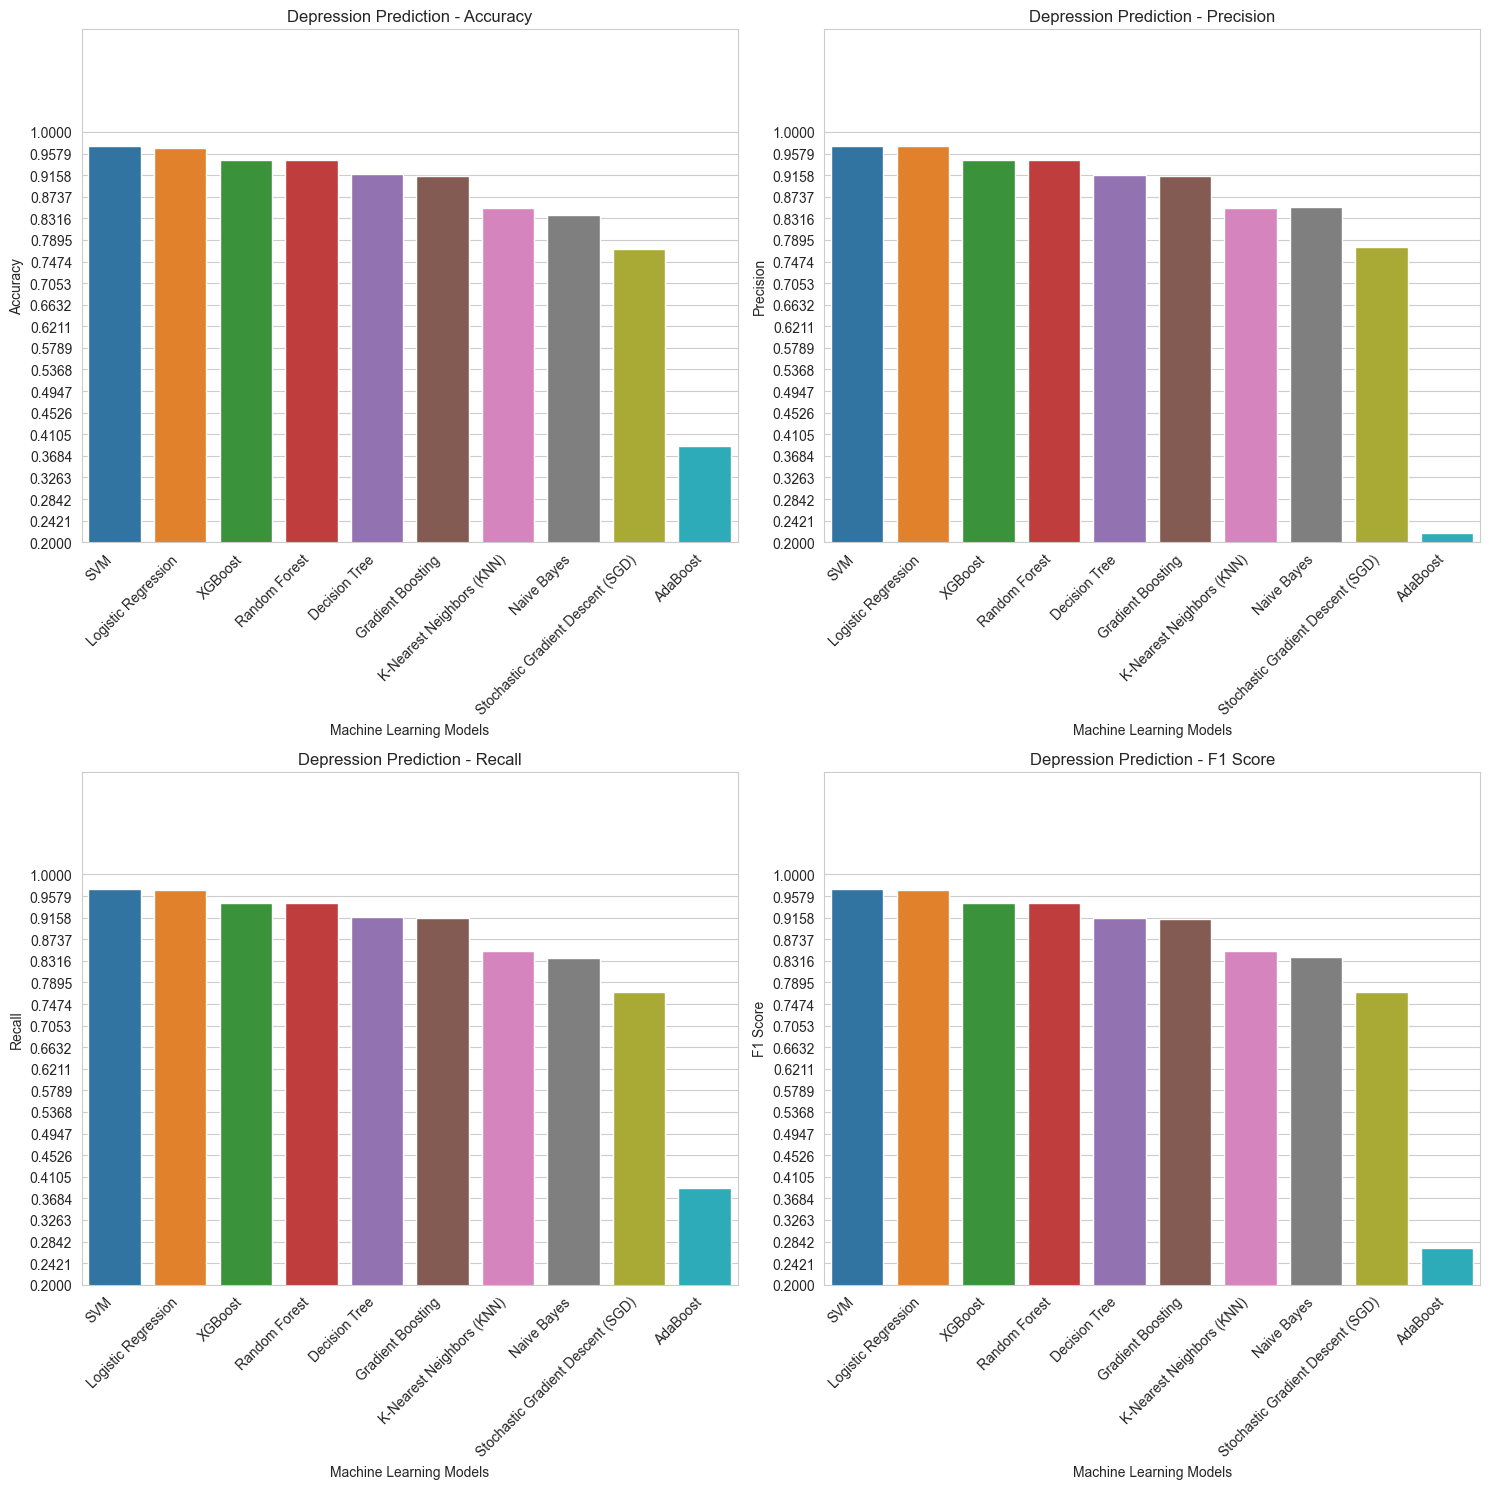

In [37]:
plt.figure(figsize=(15, 15))
sns.set_style("whitegrid")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for idx, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, idx)
    colors = sns.color_palette("tab10", n_colors=len(results_df))
    sns.barplot(
        x='Model',
        y=metric,
        data=results_df,
        palette=colors
    )
    plt.ylim(0.20, 1.2)  # Start y-axis at 60%
    plt.yticks(np.linspace(0.20, 1.0, 20))
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Depression Prediction - {metric}')
    plt.ylabel(metric)
    plt.xlabel('Machine Learning Models')

plt.tight_layout()
plt.show()


In [38]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

SEED = 42

# Define targets and file save names
targets = ["Stress_Level", "Anxiety_Level", "Depression_Level"]
save_names = ["stress_best_model.pkl", "anxiety_best_model.pkl", "depression_best_model.pkl"]

# Loop through each mental health target
for target, save_name in zip(targets, save_names):
    print(f"\n🔎 Training for Target: {target}")

    # Select corresponding raw features
    if target == "Stress_Level":
        features = [col for col in df.columns if 'Q3_' in col and '_S' in col]
    elif target == "Anxiety_Level":
        features = [col for col in df.columns if 'Q3_' in col and '_A' in col]
    else:
        features = [col for col in df.columns if 'Q3_' in col and '_D' in col]

    X = df[features]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED, stratify=y
    )

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model training and selection
    best_model = None
    best_acc = 0
    best_model_name = ""

    for model_name, model in models.items():
        print(f"Training {model_name}...")

        if model_name == 'XGBoost':
            model.fit(X_train_scaled, y_train - 1)
            y_pred = model.predict(X_test_scaled) + 1
        else:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)

        if acc > best_acc:
            best_acc = acc
            best_model = model
            best_model_name = model_name

    print(f"✅ Best Model for {target}: {best_model_name} with Accuracy: {best_acc:.4f}")

    # Save the best model
    joblib.dump(best_model, save_name)
    print(f"✅ Saved: {save_name}")

# Optional: Save scaler if needed
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved.")



🔎 Training for Target: Stress_Level
Training Logistic Regression...
Training Stochastic Gradient Descent (SGD)...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training AdaBoost...
Training SVM...
Training K-Nearest Neighbors (KNN)...
Training Naive Bayes...
Training XGBoost...
✅ Best Model for Stress_Level: SVM with Accuracy: 0.9807
✅ Saved: stress_best_model.pkl

🔎 Training for Target: Anxiety_Level
Training Logistic Regression...
Training Stochastic Gradient Descent (SGD)...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training AdaBoost...
Training SVM...
Training K-Nearest Neighbors (KNN)...
Training Naive Bayes...
Training XGBoost...
✅ Best Model for Anxiety_Level: SVM with Accuracy: 0.9862
✅ Saved: anxiety_best_model.pkl

🔎 Training for Target: Depression_Level
Training Logistic Regression...
Training Stochastic Gradient Descent (SGD)...
Training Decision Tree...
Training Random Forest...
Training Gradient 